In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [8]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [9]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
X_train.shape

(34799, 32, 32, 3)

In [11]:
y_train.shape

(34799,)

IMAGES VISUALIZATION

14

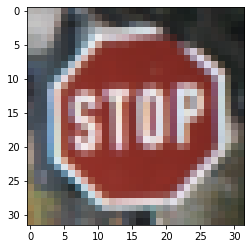

In [12]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

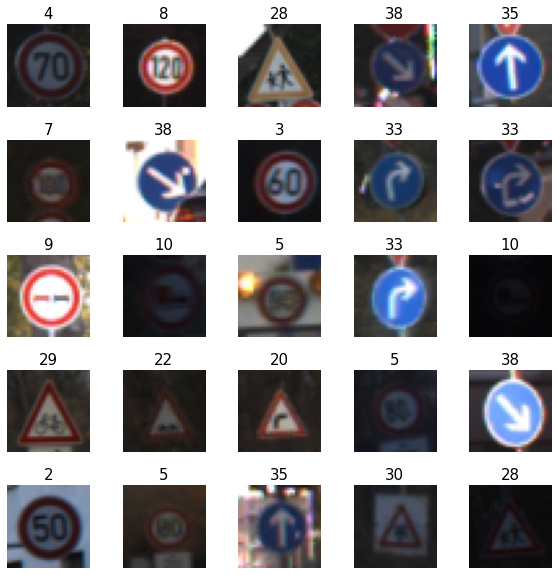

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

TRANSFORMATIONS: IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

Gray-scaled images consists of 1 channel while colored images consists of 3 channels indicating Red, Green and Blue

In [14]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [15]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [16]:
X_train_gray.shape


(34799, 32, 32, 1)

In [17]:
X_test_gray.shape


(12630, 32, 32, 1)

In [18]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [19]:
X_train_gray_norm

array([[[[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [-0.19010417],
         [-0.19791667],
         [-0.203125  ]],

        [[ 0.9921875 ],
         [ 0.94791667],
         [ 0.85416667],
         ...,
         [-0.15364583],
         [-0.25260417],
         [-0.265625  ]],

        [[ 0.77864583],
         [ 0.59635417],
         [ 0.48697917],
         ...,
         [-0.078125  ],
         [-0.2265625 ],
         [-0.30989583]],

        ...,

        [[-0.27083333],
         [-0.2734375 ],
         [-0.26302083],
         ...,
         [-0.37239583],
         [-0.40625   ],
         [-0.39583333]],

        [[-0.15625   ],
         [-0.12239583],
         [-0.1015625 ],
         ...,
         [-0.40104167],
         [-0.4140625 ],
         [-0.40885417]],

        [[ 0.2109375 ],
         [ 0.2578125 ],
         [ 0.24739583],
         ...,
         [-0.41145833],
         [-0.42447917],
         [-0.42708333]]],


       [[[-0.6328125 ],


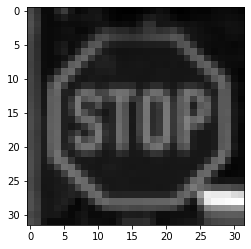

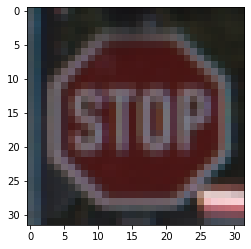

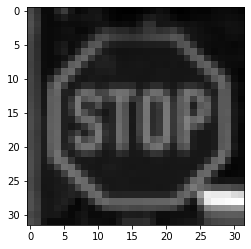

In [20]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [21]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

COMPILE AND TRAIN DEEP CNN MODEL

In [22]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/5
70/70 [==============================] - 10s 136ms/step - loss: 3.2605 - accuracy: 0.1511 - val_loss: 2.9034 - val_accuracy: 0.2420
Epoch 2/5
70/70 [==============================] - 7s 95ms/step - loss: 1.8742 - accuracy: 0.4867 - val_loss: 1.6242 - val_accuracy: 0.5413
Epoch 3/5
70/70 [==============================] - 7s 104ms/step - loss: 1.0294 - accuracy: 0.7047 - val_loss: 1.0794 - val_accuracy: 0.6853
Epoch 4/5
70/70 [==============================] - 7s 99ms/step - loss: 0.7127 - accuracy: 0.7977 - val_loss: 0.9439 - val_accuracy: 0.7181
Epoch 5/5
70/70 [==============================] - 7s 101ms/step - loss: 0.5610 - accuracy: 0.8451 - val_loss: 0.8330 - val_accuracy: 0.7553


ASSESS TRAINED CNN MODEL PERFORMANCE 

In [25]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.1057 - accuracy: 0.7439
Test Accuracy: 0.7438638210296631


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

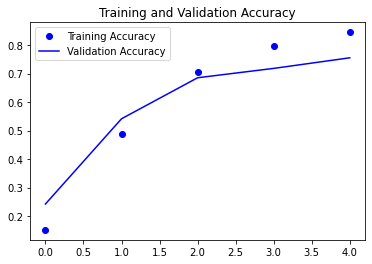

In [28]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

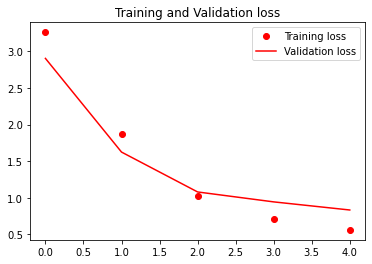

In [29]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [30]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

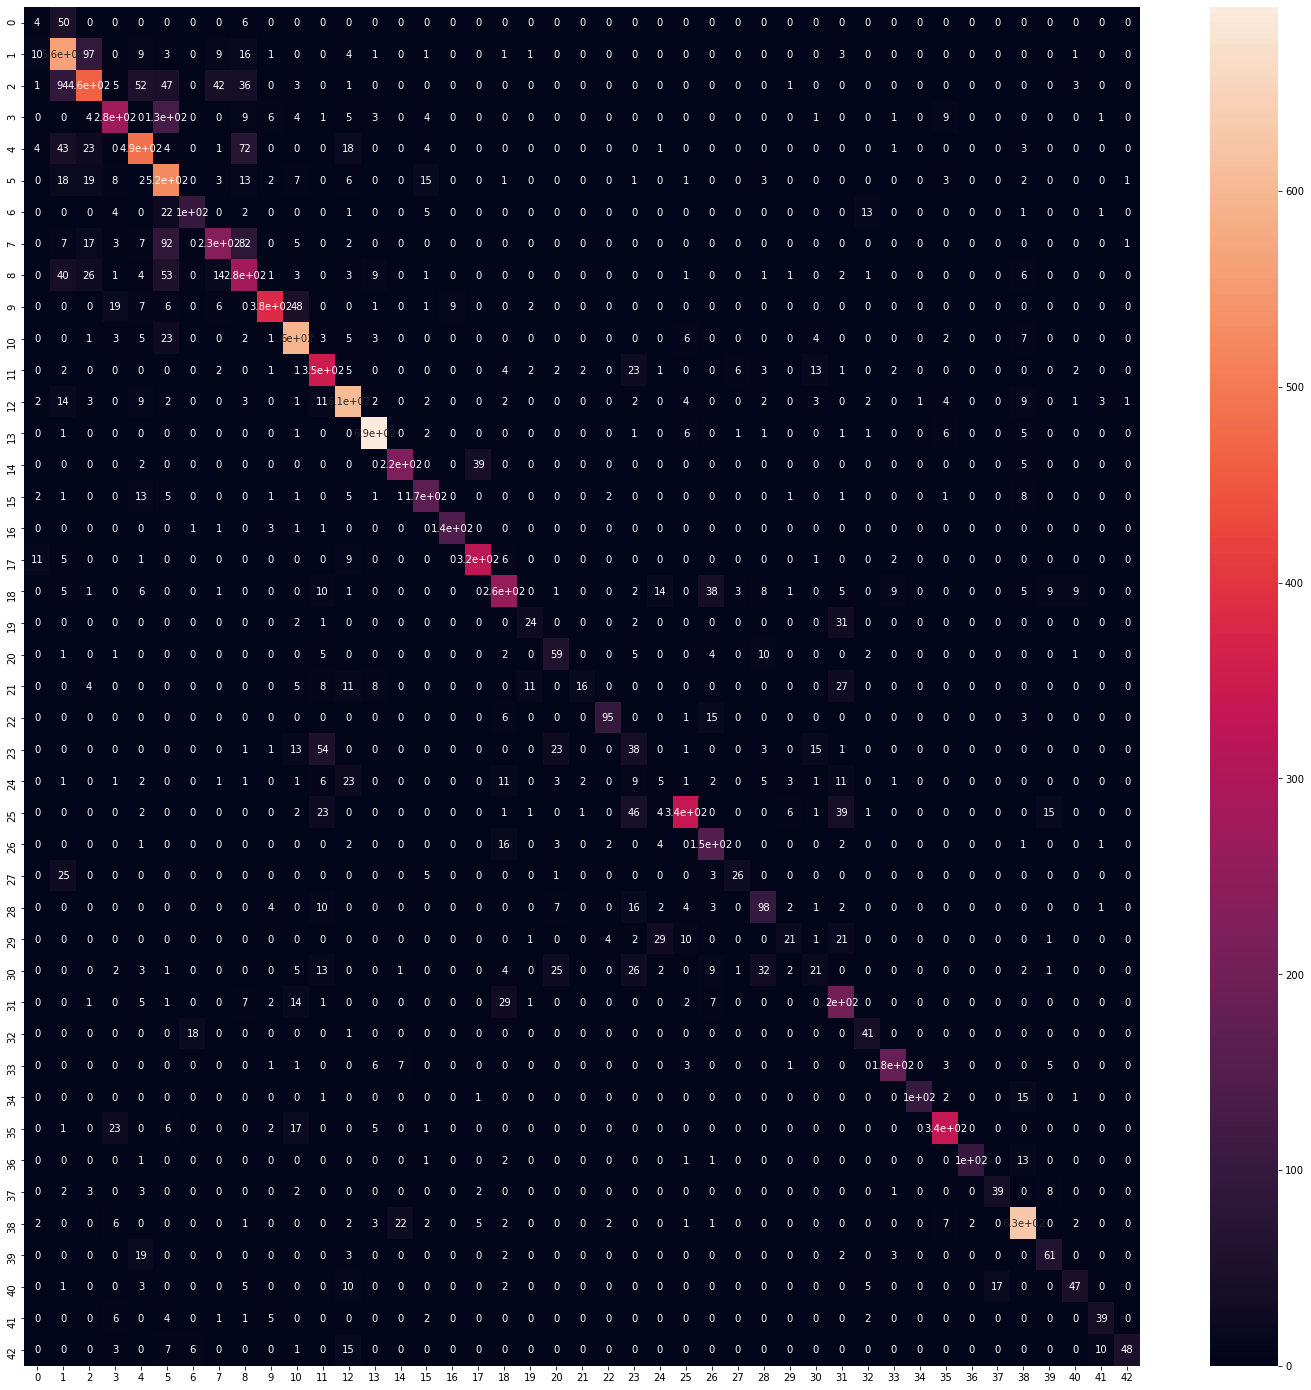

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

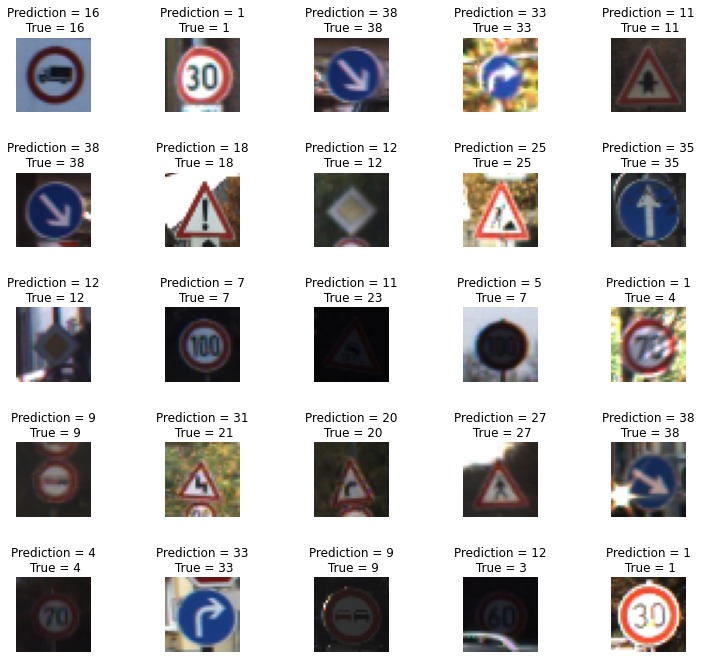

In [32]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    